
=== EDGE DETECTION ===


Edge detection test/nofire: 100%|██████████| 251/251 [00:03<00:00, 67.17img/s]


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\SLIIT\\Year 2 Semester 1\\IT2011 - Artficial Intelligence and Machine Learning\\Assignment\\WildFireDetection\\results\\outputs\\edge\\eda_visualizations\\edge_detection_visualization.png'

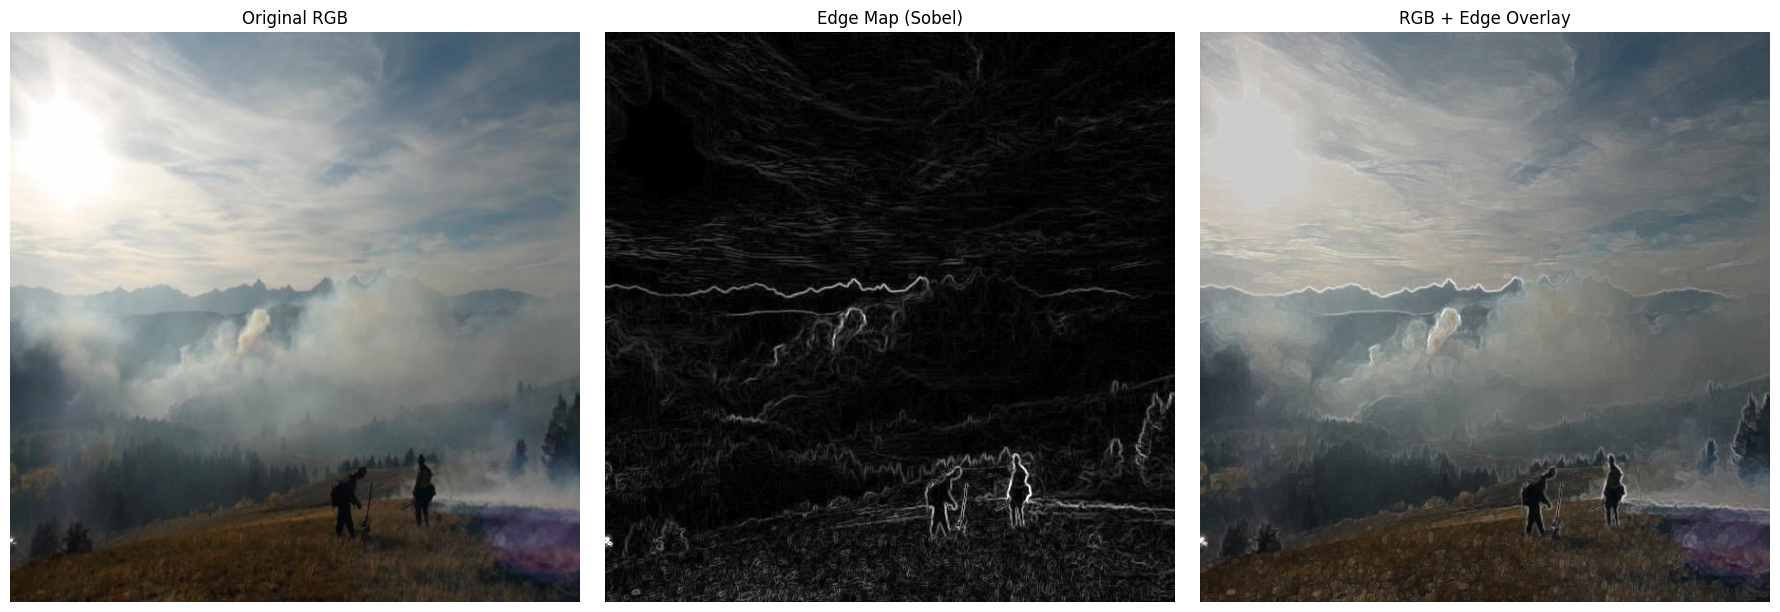

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# -----------------------------
# CONFIG
# -----------------------------
aug_dir = 'E:\\SLIIT\\Year 2 Semester 1\\IT2011 - Artficial Intelligence and Machine Learning\\Assignment\\WildFireDetection\\results\\outputs\\resized'
edge_dir = 'E:\\SLIIT\\Year 2 Semester 1\\IT2011 - Artficial Intelligence and Machine Learning\\Assignment\\WildFireDetection\\results\\outputs\\edge'
splits = ['train', 'val', 'test']
classes = ['fire', 'nofire']

# -----------------------------
# EDGE DETECTION
# -----------------------------
print("\n=== EDGE DETECTION ===")

for split in splits:
    for cls in classes:
        in_path = os.path.join(aug_dir, split, cls)
        out_path = os.path.join(edge_dir, split, cls)
        os.makedirs(out_path, exist_ok=True)
        
        img_files = [f for f in os.listdir(in_path) if f.endswith('.jpg')]
        
        for img_name in tqdm(img_files, desc=f"Edge detection {split}/{cls}", unit="img"):
            try:
                img = cv2.imread(os.path.join(in_path, img_name))
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                
                # Edge detection (Sobel)
                sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
                sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
                sobel = np.sqrt(sobelx**2 + sobely**2)
                sobel = np.uint8(np.clip(sobel, 0, 255))
                
                # Save edge map as JPG
                cv2.imwrite(os.path.join(out_path, img_name), sobel)
            except Exception as e:
                tqdm.write(f" Error processing {img_name}: {e}")

# -----------------------------
# VISUALIZATION
# -----------------------------
sample_path = os.path.join(aug_dir, 'train', 'fire')
img_files = [f for f in os.listdir(sample_path) if f.endswith('.jpg')]

if img_files:
    img_path = os.path.join(sample_path, img_files[0])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Sobel edge
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    sobel = np.uint8(np.clip(sobel, 0, 255))

    # Overlay edge on RGB for visualization
    edge_colored = cv2.cvtColor(sobel, cv2.COLOR_GRAY2RGB)  # 3-channel
    overlay = cv2.addWeighted(img_rgb, 0.8, edge_colored, 0.5, 0)

    # Plot all three
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(img_rgb)
    axes[0].set_title("Original RGB")
    axes[0].axis('off')

    axes[1].imshow(sobel, cmap='gray')
    axes[1].set_title("Edge Map (Sobel)")
    axes[1].axis('off')

    axes[2].imshow(overlay)
    axes[2].set_title("RGB + Edge Overlay")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()